In [19]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

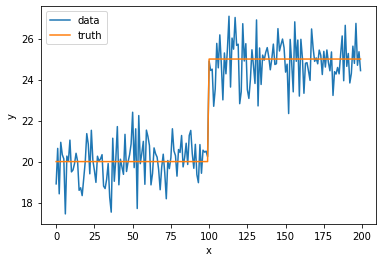

In [20]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [21]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.01, mean after: 24.90


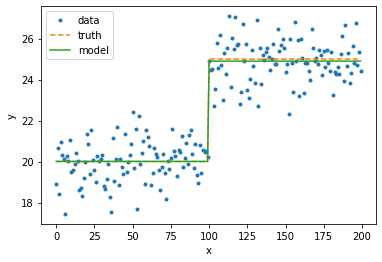

In [22]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 2: In the plot the data points are plotted as scatter points. The green line represents model attempting to identify the point of change, by looking at the maximum difference between the means of sub-samples. Given that this is data that we generate, we know the true point of change which we contrast with the model. 

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [0]:
def poc_mse(y):

    poc, sq_diff, before, after = 0, 0 , np.nan , np.nan
    for i in range(1, len(y)): 
        sq_diff_loop = (np.sum(y[i:]      -    np.nanmean(y[i:])**2.0)) +\
                      (np.sum(y[:i]    -    np.nanmean( y[:i] )**2.0))

        if sq_diff_loop <= sq_diff: #maximized difference  leads to POC
            sq_diff = sq_diff_loop
            poc = i 
            before, after = np.mean(y[:i]), mean(y[i:]) ####taking the means relative to POC 
  


    return poc, before, after

In [48]:

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))


poc: 100.00, mean before: 20.01, mean after: 24.90


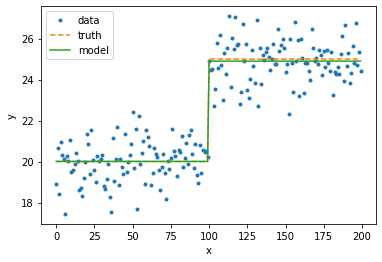

In [46]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 3: Similar to the plot in figure two, however using a new model to find the POC. This model minimizes the square error to find the POC. As with prior models, this one has high accuracy in the means values of the sub samples. 

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 20
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [56]:
def maxdiff(y, sigma=False):    #sigma=False
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)"""
    
    if not sigma: 
      N = len(y)
      f = np.nanmean
      poc, diff, before, after = 0, 0, np.nan, np.nan
      for i in range(1, N):
          diff_here = np.abs(f(y[i:]) -  f(y[:i]))
          if diff < diff_here:
              diff = diff_here
              poc = i
              before, after = f(y[:i]), f(y[i:])
      return(poc, before, after) 

    else: 
      N = len(y)
      f = np.std
      poc, diff, before, after = 0, 0, np.nan, np.nan
      for i in range(1, N):
          diff_here = np.abs(f(y[i:]) -  f(y[:i]))
          if diff < diff_here:
              diff = diff_here
              poc = i
              before, after = f(y[:i]), f(y[i:])
      return(poc, before, after)                    

 
print("poc: {:.2f}, standard deviation before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ys, sigma=True
                                                                 )))


poc: 100.00, standard deviation before: 0.99, mean after: 4.24


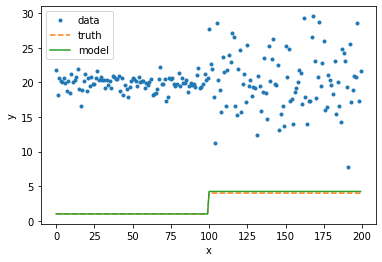

In [60]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [1] * 100 + [s2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 4: Similar to figure 2, but the model relies on the maximum difference between the variances of the subsets. The systhetic data is generate by a gaussian set, with the same mean, but different variances, for which we establish our "true" line to the POC.  This illustrates that points of change can be found by either looking for the changes in either mean or variance of subsamples. 

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

In [0]:
# detection
algo = rpt.Pelt(model='l1').fit(ym)
result = algo.predict(pen=3)



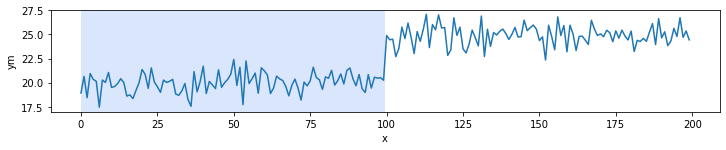

In [85]:
# display
rpt.display(ym, [100], result)
plt.xlabel('x')
plt.ylabel('ym')
pl.show()

Figure 5: In the figure is the point change(black line)  for the data that varies in mean, as before, identified by the Rupture Pelt method, which execute segmentation on the data set, using an L1 model. 

In [0]:
# detection
algo = rpt.Pelt(model='l1').fit(ys)
result = algo.predict(pen=3)



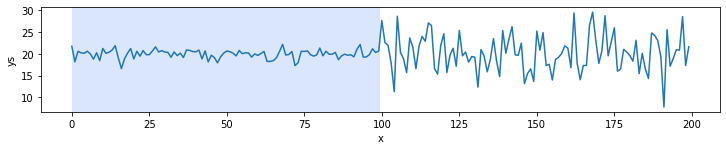

In [86]:
# display
rpt.display(ys, [100], result)
plt.xlabel('x')
plt.ylabel('ys')
pl.show()

Figure 6: In the figure is the points for the earlier data the varies in variances. This POC is found using the Pelt Method, with an l1 model. As, we can see is over predicts the number of points of change meaning, and essentially give false positives,so some restrictions would need to be made on the model. 

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [65]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv")
eq1.describe()



,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


In [66]:
eq1.head()

,Unnamed: 0,acoustic_data,time_to_failure
0,0,12,1.4691
1,1,6,1.4691
2,2,8,1.4691
3,3,5,1.4691
4,4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




In [0]:
algo1 = rpt.Dynp(model='rbf', min_size=50).fit(eq1.acoustic_data.values[:10000])
result = algo1.predict(n_bkps=1)



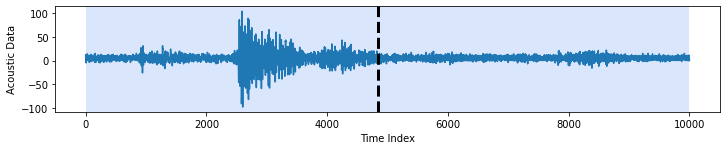

In [87]:
# display
rpt.display(eq1.acoustic_data.values[:10000], [10000], result)
plt.xlabel('Time Index')
plt.ylabel('Acoustic Data')
plt.show()

Figure 7: We model the point of change using Ruptures's Dynamic programing method, set to a simple L1 model . We use it to find one point of change in the first 10000 points of an earthdata set. As we can see the prediction is close to where the accoustic data begins to peak. This model has the highest computational complexit, but only relies on singular segmentation. 

In [0]:

algo2 = rpt.Dynp(model='rbf', min_size=100).fit(eq1.acoustic_data.values[:5000])
result2 = algo2.predict(n_bkps=2)


In [0]:

# display
rpt.display(eq1.acoustic_data.values[:5000], [5000], result2)
plt.xlabel('Time Index')
plt.ylabel('Acoustic Data')
plt.show()

Figure 8: No description or plot yet, computing time took to long. 

In [0]:
algo3 = rpt.Dynp(model='rbf', min_size=5).fit(eq1.acoustic_data.values[:1000])
result3 = algo3.predict(n_bkps=3)



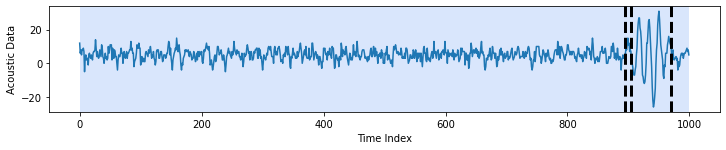

In [89]:
# display
rpt.display(eq1.acoustic_data.values[:1000], [1000], result3)
plt.xlabel('Time Index')
plt.ylabel('Acoustic Data')
plt.show()

Figure 9: Sames as figure 8, however we look for 3 points of changes with in the first 1000 data point. This is the least computationally expensive of the appraoches. One risk that seems to, at this point, not be consequential, is chooing the min_size, which establishes the minimum distance between points of change. It can speed up the procees, but the risk is that POC will be over looked if it is closer than the minimum bounds, once the first point is found. 

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

In [0]:
algo4 = rpt.BottomUp(model='rbf', min_size=100).fit(eq1.acoustic_data.values[:10000])
result4 = algo4.predict(n_bkps=3)

In [0]:
algo5 = rpt.Dynp(model='rbf', min_size=400).fit(eq1.acoustic_data.values[:10000])
result = algo1.predict(n_bkps=3)

caption (note that your plot does not need to look exactly like mine

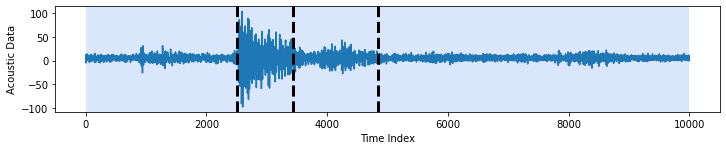

In [107]:
# display
rpt.display(eq1.acoustic_data.values[:10000], [10000], result4)
plt.xlabel('Time Index')
plt.ylabel('Acoustic Data')

rpt.display(eq1.acoustic_data.values[:10000], [10000], result5)
plt.xlabel('Time Index')
plt.ylabel('Acoustic Data')
plt.show()

Figure 10: Above are two plots  the top one found with the BottomUP method, that begins with may points of change and removes them based on significance.  This was used to find 3 points of change. The bottom plot, is for the 3 points of change found with the slower Dynamic (exact segmentation) approach. (The second plot took long to execute, so does not have a description.